In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objects as go
import plotly
from textblob import TextBlob as tb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.interpolate import interp1d
import pandas as pd
import folium
from folium.plugins import HeatMap
import Levenshtein

ModuleNotFoundError: ignored

0.0639129303826589
0.2303242080076376
0.4691590125773786
0.23192148906041926
0.05231557130778092
0.24779379253602302
0.47071756809233806
0.24243668370161633


Text(0, 0.5, 'number of comments')

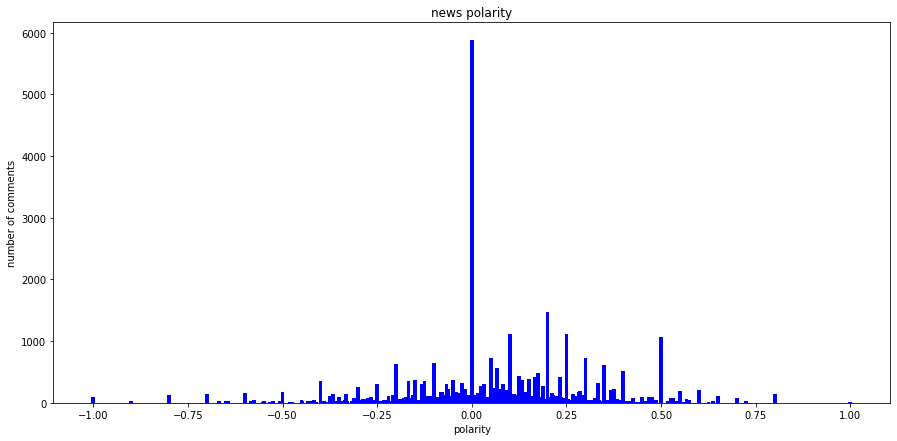

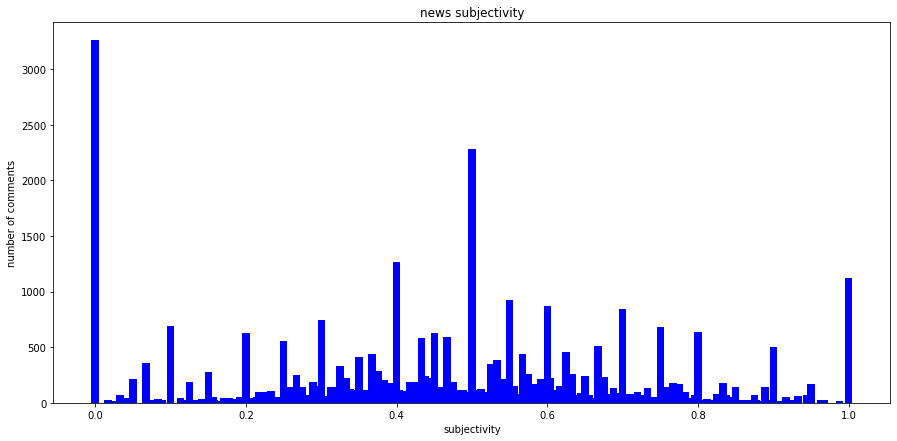

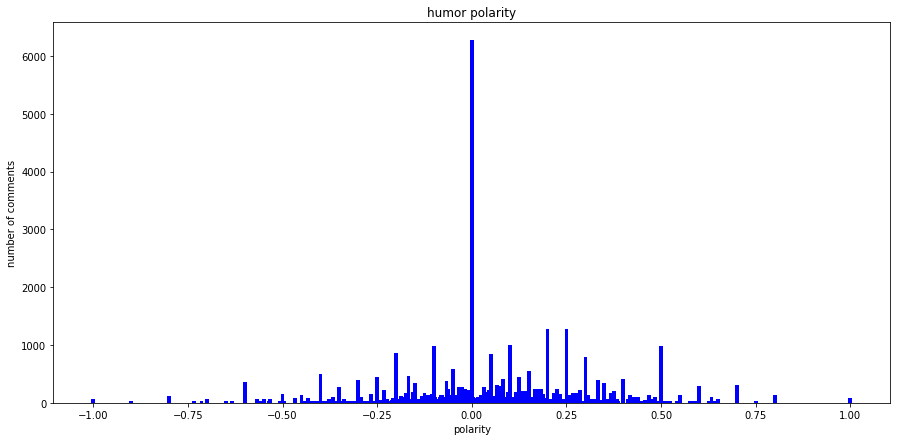

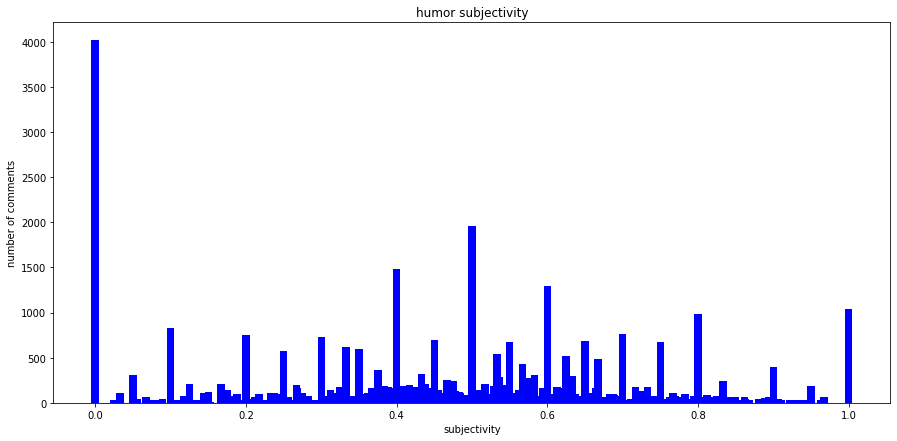

In [ ]:

reddit_df = pd.read_pickle("/content/drive/MyDrive/psosm midsem/redditDataset.pkl")
news_df=reddit_df[reddit_df['subreddit']=='news']
polarity={}
mean=0
total=0
sentiments=[]
for i in news_df['text']:
  p=(tb(i).sentiment.polarity)
  sentiments.append(p)
  mean=mean+p
  total=total+1
mean=mean/total
print(mean)
sd=0
for i in range(len(sentiments)):
  p=round(sentiments[i],3)
  sd=sd+(mean-p)**2
  if p in polarity:
    polarity[p]=polarity[p]+1
  else:
    polarity[p]=1
sd=(sd/total)**(1/2)
print(sd)
fig2=plt.figure(figsize=(15,7))
plt.bar(polarity.keys(),polarity.values(),color="blue",width=0.01,label="news polarity")
plt.title("news polarity")
plt.xlabel("polarity")
plt.ylabel("number of comments")
#subjectivity
polarity={}
mean=0
total=0
sentiments=[]
for i in news_df['text']:
  p=(tb(i).sentiment.subjectivity)
  sentiments.append(p)
  mean=mean+p
  total=total+1
mean=mean/total
print(mean)
sd=0
for i in range(len(sentiments)):
  p=round(sentiments[i],3)
  sd=sd+(mean-p)**2
  if p in polarity:
    polarity[p]=polarity[p]+1
  else:
    polarity[p]=1
sd=(sd/total)**(1/2)
print(sd)
fig2=plt.figure(figsize=(15,7))
plt.bar(polarity.keys(),polarity.values(),color="blue",width=0.01,label="news subjectivity")
plt.title("news subjectivity")
plt.xlabel("subjectivity")
plt.ylabel("number of comments")
# humor polarity
humor_df=reddit_df[reddit_df['subreddit']=='humor']
polarityh={}
mean=0
total=0
sentiments=[]
for i in humor_df['text']:
  p=(tb(i).sentiment.polarity)
  sentiments.append(p)
  mean=mean+p
  total=total+1
mean=mean/total
print(mean)
sd=0
for i in range(len(sentiments)):
  p=round(sentiments[i],3)
  sd=sd+(mean-p)**2
  if p in polarityh:
    polarityh[p]=polarityh[p]+1
  else:
    polarityh[p]=1
sd=(sd/total)**(1/2)
print(sd)
fig2=plt.figure(figsize=(15,7))
plt.bar(polarityh.keys(),polarityh.values(),color="blue",width=0.01)
plt.title("humor polarity")
plt.xlabel("polarity")
plt.ylabel("number of comments")
# subjectivity

polarity={}
mean=0
total=0
sentiments=[]
for i in humor_df['text']:
  p=(tb(i).sentiment.subjectivity)
  sentiments.append(p)
  mean=mean+p
  total=total+1
mean=mean/total
print(mean)
sd=0
for i in range(len(sentiments)):
  p=round(sentiments[i],3)
  sd=sd+(mean-p)**2
  if p in polarity:
    polarity[p]=polarity[p]+1
  else:
    polarity[p]=1
sd=(sd/total)**(1/2)
print(sd)
fig2=plt.figure(figsize=(15,7))
plt.bar(polarity.keys(),polarity.values(),color="blue",width=0.01,label="verified and human")
plt.title("humor subjectivity")
plt.xlabel("subjectivity")
plt.ylabel("number of comments")

accuracy score: 0.784037558685446
precision score: 0.7625272331154684
recall score: 0.6769825918762089
f1 score: 0.7172131147540984
  actual label prediction                                               text
0        humor      humor  generally speaking  i m an asshole that being ...
1        humor      humor  my husband would have done the exact same thin...
2        humor      humor  i will go out of my way to transfer you to mak...
3        humor      humor  maybe the bird is a really tough ski coach   y...
4         news       news  this war on cash is such bullshit  people carr...


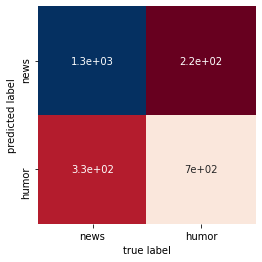

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/psosm midsem/redditDataset.pkl").drop_duplicates()
df['label'] = df['subreddit'].apply(lambda x: 0 if x=='news' else 1)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=1,test_size=0.7)
cv = CountVectorizer( token_pattern=r'\S+', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)
acc=accuracy_score(y_test, predictions)
prec=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
print("accuracy score:",acc )
print("precision score:",prec )
print("recall score:", recall)
print("f1 score:", (2*prec*recall)/(prec+recall))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['news', 'humor'], yticklabels=['news', 'humor'])
plt.xlabel( 'true label')
plt.ylabel('predicted label')
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('humor')
    else:
        testing_predictions.append('news')

check_df = pd.DataFrame({'actual label': list(y_test), 'prediction': testing_predictions, 'text':list(X_test)})
check_df.replace(to_replace=0, value='news', inplace=True)
check_df.replace(to_replace=1, value='humor', inplace=True)
df_temp=check_df[check_df['prediction']==check_df['actual label']][0:6]
print(df_temp.head())

import pickle
file="pickle_out"
out=open(file,'wb')
pickle.dump(naive_bayes,out)
out.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
1


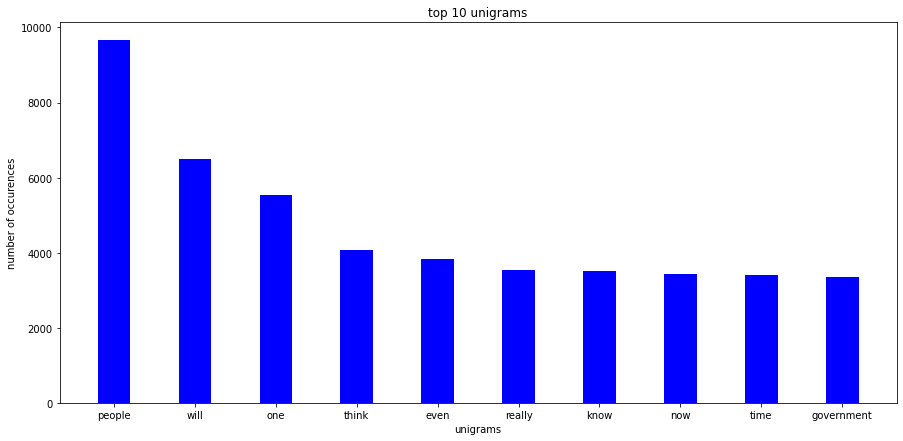

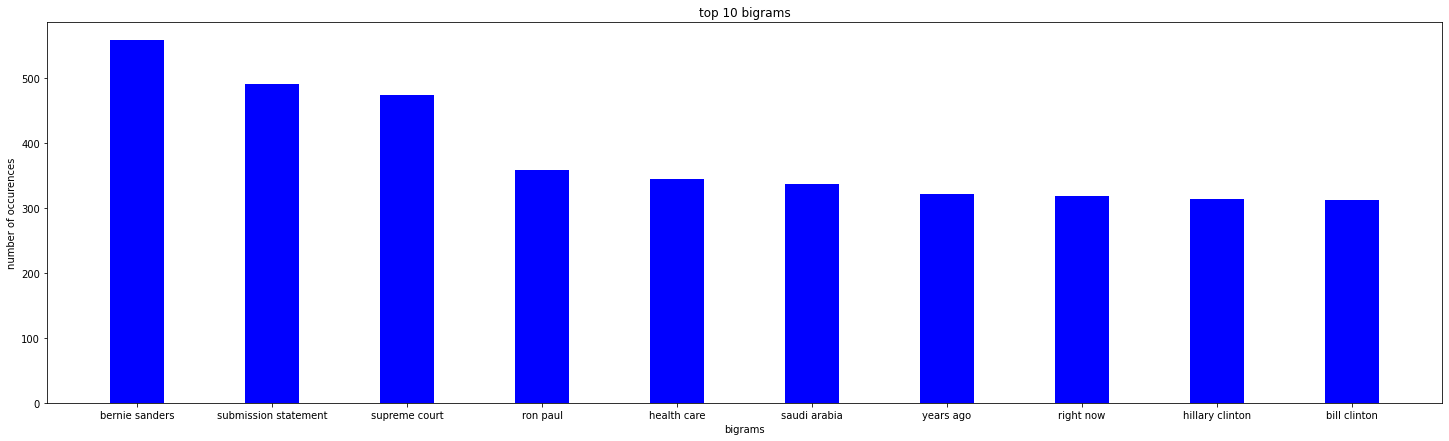

In [ ]:
import nltk
nltk.download('punkt')
def extract_ngrams(data, num):
    n_grams = tb(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

text=""
url=re.compile(r"https?://\s+|www\.\s+")
html=re.compile(r"<.*?>")
for i in news_df['text']:
  t=url.sub(r"", i)
  t=html.sub(r"",i)
  text=" ".join([text, t]) 
sw=set(STOPWORDS)
words=text.split(" ")
unigrams=[]
for word in words:
  if word not in sw and len(word)>=3 and len(word)<=12:
    unigrams.append(word)
uniDict={}
for i in unigrams:
  if i in uniDict:
    uniDict[i]=uniDict[i]+1
  else:
    uniDict[i]=1

print(1)
sorted_countsList=sorted(uniDict.items(), key=lambda x: x[1],reverse=True)[:10] 
sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, b)
fig=plt.figure(figsize=(15,7))
plt.bar(sorted_counts.keys(),sorted_counts.values(),color="blue",width=0.4)
plt.xlabel("unigrams")
plt.ylabel("number of occurences")
plt.title("top 10 unigrams")
plt.show()

bigrams=extract_ngrams("\n".join(unigrams),2)

biDict={}
for i in bigrams:
  if i in biDict:
    biDict[i]=biDict[i]+1
  else:
    biDict[i]=1
sorted_countsList=sorted(biDict.items(), key=lambda x: x[1],reverse=True)[:10] 
sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, b)
fig=plt.figure(figsize=(25,7))
plt.bar(sorted_counts.keys(),sorted_counts.values(),color="blue",width=0.4)
plt.xlabel("bigrams")
plt.ylabel("number of occurences")
plt.title("top 10 bigrams")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
1


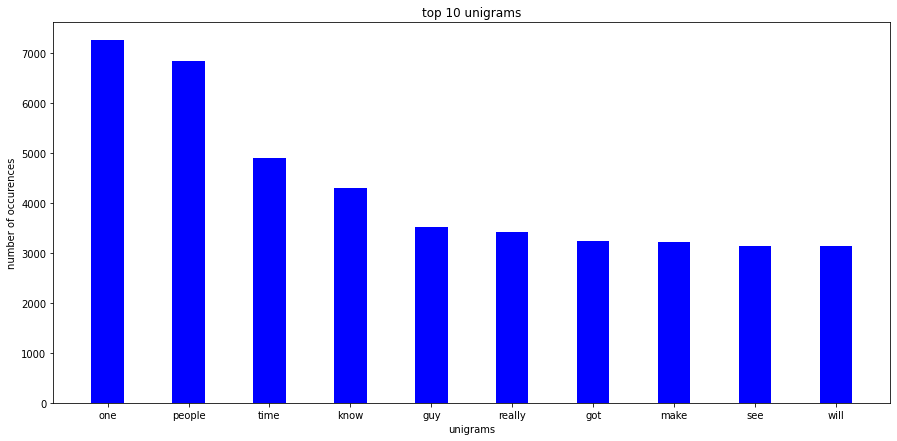

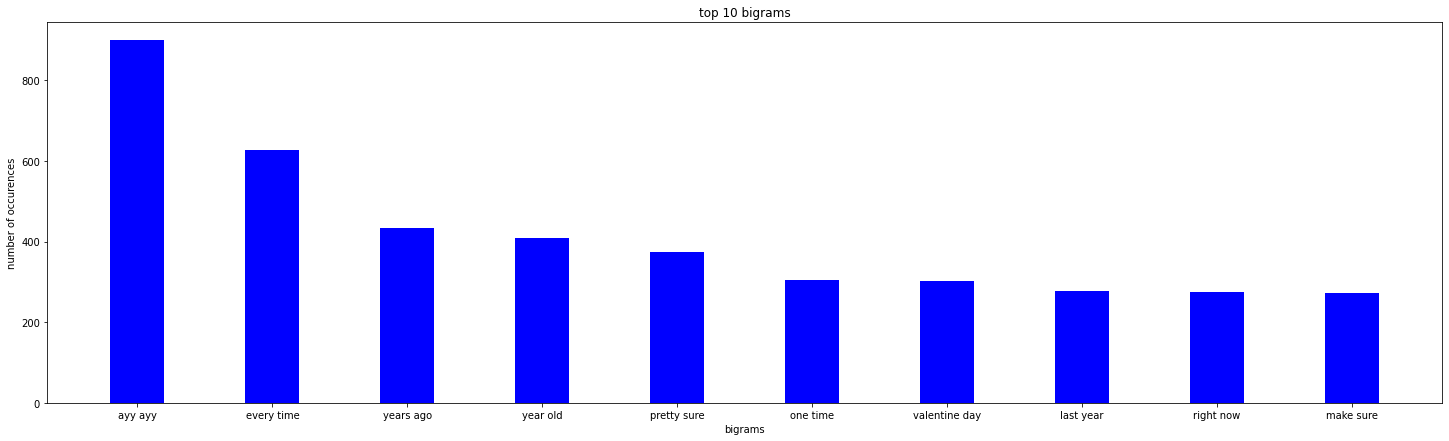

In [ ]:
import nltk
nltk.download('punkt')
def extract_ngrams(data, num):
    n_grams = tb(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

text=""
url=re.compile(r"https?://\s+|www\.\s+")
html=re.compile(r"<.*?>")
for i in humor_df['text']:
  t=url.sub(r"", i)
  t=html.sub(r"",i)
  text=" ".join([text, t]) 
sw=set(STOPWORDS)
words=text.split(" ")
unigrams=[]
for word in words:
  if word not in sw and len(word)>=3 :
    unigrams.append(word)
uniDict={}
for i in unigrams:
  if i in uniDict:
    uniDict[i]=uniDict[i]+1
  else:
    uniDict[i]=1

print(1)
sorted_countsList=sorted(uniDict.items(), key=lambda x: x[1],reverse=True)[:10] 
sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, b)
fig=plt.figure(figsize=(15,7))
plt.bar(sorted_counts.keys(),sorted_counts.values(),color="blue",width=0.4)
plt.xlabel("unigrams")
plt.ylabel("number of occurences")
plt.title("top 10 unigrams")
plt.show()

bigrams=extract_ngrams("\n".join(unigrams),2)

biDict={}
for i in bigrams:
  if i in biDict:
    biDict[i]=biDict[i]+1
  else:
    biDict[i]=1
sorted_countsList=sorted(biDict.items(), key=lambda x: x[1],reverse=True)[:10] 
sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, b)
fig=plt.figure(figsize=(25,7))
plt.bar(sorted_counts.keys(),sorted_counts.values(),color="blue",width=0.4)
plt.xlabel("bigrams")
plt.ylabel("number of occurences")
plt.title("top 10 bigrams")
plt.show()
